In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from function.backtest import *

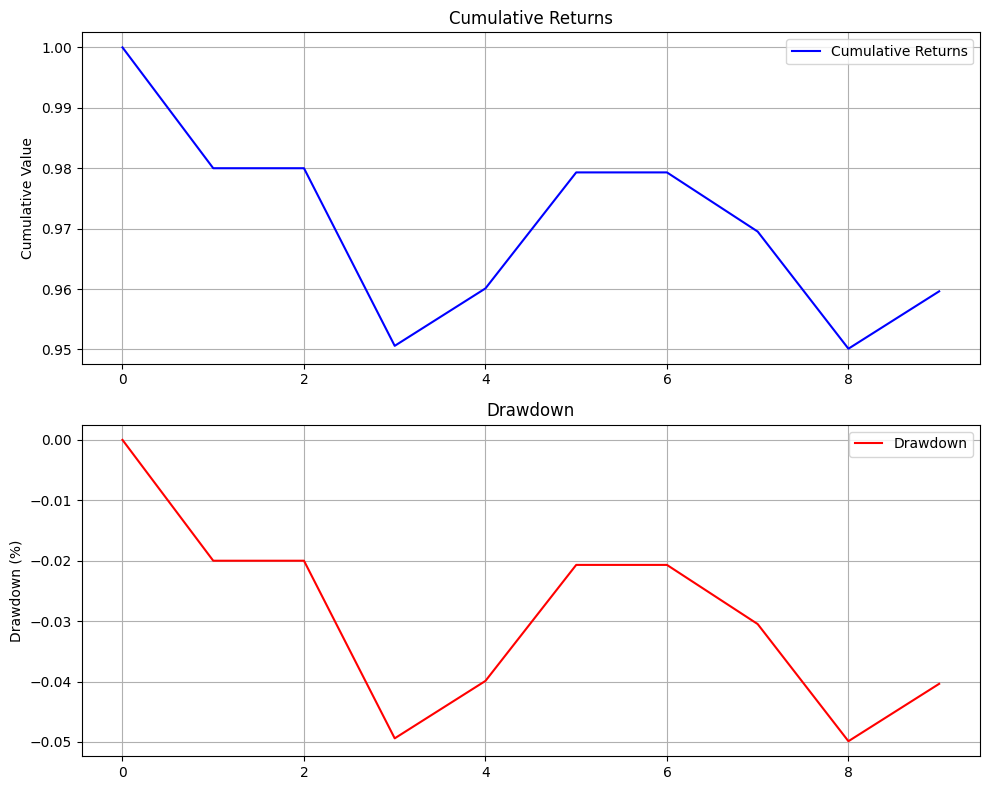

=== Backtesting Results ===
Total Profit/Loss: -0.04
Sharpe Ratio: -4.02
Max Drawdown: -4.99%
Cumulative Return: -4.04%

DataFrame with Strategy Returns and Metrics:
    signals  returns  strategy_returns  cumulative_returns
0        1     0.01              0.00            1.000000
1        0    -0.02             -0.02            0.980000
2       -1    -0.01             -0.00            0.980000
3        1     0.03             -0.03            0.950600
4       -1     0.01              0.01            0.960106
5        0    -0.02              0.02            0.979308
6        1     0.03              0.00            0.979308
7       -1    -0.01             -0.01            0.969515
8        1     0.02             -0.02            0.950125
9        1     0.01              0.01            0.959626


In [3]:
# Simple Test with dummy data

# Example usage with sample data:
signals = [1, 0, -1, 1, -1, 0, 1, -1, 1, 1]  # sample trading signals
returns = [0.01, -0.02, -0.01, 0.03, 0.01, -0.02, 0.03, -0.01, 0.02, 0.01]  # sample daily returns

# Running the backtest with charts
results = backtest_strategy(signals, returns, plot_charts=True)

# Output results
print("=== Backtesting Results ===")
print(f"Total Profit/Loss: {results['Total PnL']:.2f}")
print(f"Sharpe Ratio: {results['Sharpe Ratio']:.2f}")
print(f"Max Drawdown: {results['Max Drawdown']:.2%}")
print(f"Cumulative Return: {results['Cumulative Return']:.2%}")

# Optional: Display the full DataFrame for detailed strategy analysis
print("\nDataFrame with Strategy Returns and Metrics:\n", results['Performance DataFrame'])

[*********************100%***********************]  1 of 1 completed
C:\Users\gbe19_6azx2mp\AppData\Local\Temp\ipykernel_3644\1763282359.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['signals'][short_window:] = np.where(data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1, 0)


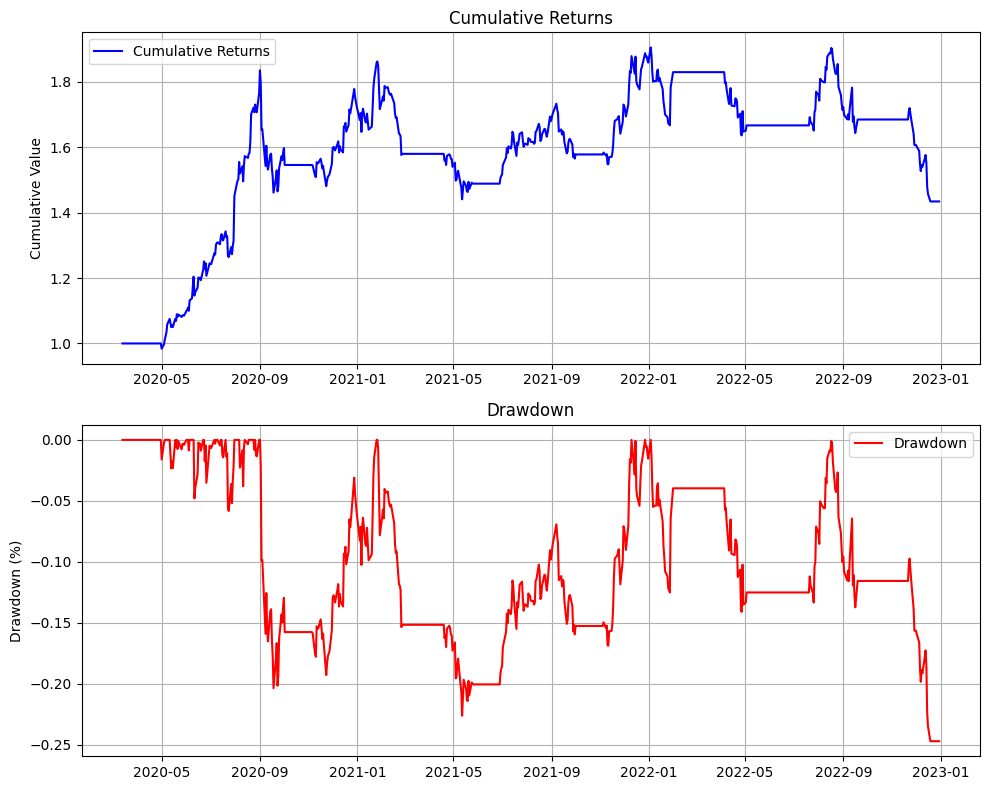

Total PnL: 0.44
Sharpe Ratio: 0.66
Max Drawdown: -24.72%
Cumulative Return: 43.42%


In [8]:
# Simple example on real-world data

# Fetch historical stock price data
ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2023-01-01'

data = yf.download(ticker, start=start_date, end=end_date)

# Calculate daily returns
data['returns'] = data['Adj Close'].pct_change()

# Generate trading signals based on moving averages
short_window = 20
long_window = 50

data['Short_MA'] = data['Adj Close'].rolling(window=short_window).mean()
data['Long_MA'] = data['Adj Close'].rolling(window=long_window).mean()
data['signals'] = 0
data['signals'][short_window:] = np.where(data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1, 0)

# Drop NaN values from the DataFrame
data.dropna(inplace=True)

# Backtest the strategy
results = backtest_strategy(signals=data['signals'], returns=data['returns'], plot_charts=True)

# Print the results
print(f"Total PnL: {results['Total PnL']:.2f}")
print(f"Sharpe Ratio: {results['Sharpe Ratio']:.2f}")
print(f"Max Drawdown: {results['Max Drawdown']:.2%}")
print(f"Cumulative Return: {results['Cumulative Return']:.2%}")